__Частина 1__

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів `Keras`, яка буде класифікувати товари із датасету `fasion_mnist`.

На відміну від попереднього завдання вам пропонується створити `згорткову нейромережу`. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти `максимально можливої точності класифікації` за рахунок `маніпуляції параметрами` мережі. `Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання`. Зробіть висновки.
<br><br>
__Частина 2__

В цій частині ми знову будемо працювати з датасетом `fasion_mnist`.

На відміну від попереднього завдання вам пропонується створити `згорткову нейромережу`, що використовує `VGG16` в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти `максимально можливої точності класифікації` за рахунок `маніпуляції параметрами` мережі. Під час навчання використовуйте `прийоми донавчання` та `виділення ознак`.

`Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання`. Зробіть висновки.

In [93]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.activations import mish, relu, sigmoid, softmax
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import losses
from keras import metrics
from keras import models
from keras import optimizers
from sklearn.model_selection import train_test_split

# __Part 1__

##### __Dataset__

- https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [104]:
(images_train, labels_train), (images_test, labels_test) = fashion_mnist.load_data()
images_train.dtype, images_train[0].shape

(dtype('uint8'), (28, 28))

In [105]:
# each sample (28x28) = 784
NUM_FEATURES = images_train[0].shape[0] * images_train[0].shape[1]
NUM_FEATURES

784

In [106]:
images_train, images_test = np.array(images_train, np.float32), np.array(images_test, np.float32)  # .astype('float32')

# images_train, images_test = images_train.reshape([-1, NUM_FEATURES]), images_test.reshape([-1, NUM_FEATURES])
print(min(images_train.min(), images_test.min()))
maximum = max(images_train.max(), images_test.max()) # np.max([images_train.max(), images_test.max()]) 
maximum

0.0


255.0

In [107]:
# Normalize (min = 0)
images_train, images_test = images_train / maximum, images_test / maximum

In [108]:
images_train.shape, images_test.shape, labels_train.shape, labels_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [109]:
max(labels_train.max(), labels_test.max()), min(labels_train.min(), labels_test.min())

(9, 0)

In [110]:
NUM_CLASSES = len(set(np.concatenate((labels_train, labels_test), axis=0)))
NUM_CLASSES

10

In [111]:
images_valid, images_test, labels_valid, labels_test = train_test_split(
                                                                        images_test, 
                                                                        labels_test, 
                                                                        test_size=0.5, 
                                                                        shuffle=True, 
                                                                        stratify=labels_test)  # (stratify для рівномірного розподілу за значенням y)

In [112]:
labels_train = tf.one_hot(labels_train, depth=NUM_CLASSES).numpy()
labels_test = tf.one_hot(labels_test, depth=NUM_CLASSES).numpy()
labels_valid = tf.one_hot(labels_valid, depth=NUM_CLASSES).numpy()
# labels_train = to_categorical(labels_train, num_classes = NUM_CLASSES)
# labels_valid = to_categorical(labels_valid, num_classes = NUM_CLASSES)
labels_train.shape, labels_test.shape, labels_valid.shape  # ((60000, 10), (10000, 10))

((60000, 10), (5000, 10), (5000, 10))

In [113]:
images_train.shape, images_test.shape, images_valid.shape, labels_train.shape, labels_test.shape, labels_valid.shape

((60000, 28, 28),
 (5000, 28, 28),
 (5000, 28, 28),
 (60000, 10),
 (5000, 10),
 (5000, 10))

##### __Model__

- https://keras.io/api/layers/convolution_layers/convolution2d/
- https://keras.io/api/layers/pooling_layers/max_pooling2d/
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

In [114]:
kernel_window_size_1 = 3  # 5, 9, 11
kernel_window_size_2 = 3  # 5, 9, 11
kernel_window_size_3 = 3  # 5, 9, 11
filters_1 = 32  # output_depth
filters_2 = 64
filters_3 = 64
filters_4 = 64
# activation_functions = ['relu' for _ in range(4)] + ['softmax']

In [115]:
model = models.Sequential([
                           layers.Conv2D(
                                         filters_1, 
                                         (kernel_window_size_1, kernel_window_size_1), 
                                         activation='relu', 
                                         input_shape=(images_train.shape[1], images_train.shape[2], 1)  # channels 1 - gray, 3 - RGB
                                         ),  
                           layers.MaxPooling2D((2, 2)),

                           layers.Conv2D(
                                         filters_2, 
                                         (kernel_window_size_2, kernel_window_size_2), 
                                         activation='relu'
                                         ),
                           layers.MaxPooling2D((2, 2)),

                           layers.Conv2D(
                                         filters_3, 
                                         (kernel_window_size_3, kernel_window_size_3), 
                                         activation='relu'
                                         ),

                           layers.Flatten(),
                           layers.Dense(
                                        filters_4, 
                                        activation='relu'
                                        ),

                           layers.Dense(
                                        NUM_CLASSES, 
                                        activation='softmax'
                                        )
                           ])

In [116]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [117]:
model.compile(
              optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

##### __Training__

In [118]:
history = model.fit(images_train, labels_train, epochs=5, batch_size=64)  # w/o valid data

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.5649 - accuracy: 0.7914
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.3370 - accuracy: 0.8785
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 0.2838 - accuracy: 0.8967
Epoch 4/5
938/938 [==============================] - 10s 10ms/step - loss: 0.2527 - accuracy: 0.9071
Epoch 5/5
938/938 [==============================] - 10s 10ms/step - loss: 0.2282 - accuracy: 0.9164


##### __Error Analysis__

In [119]:
history.history

{'loss': [0.5649124383926392,
  0.33701926469802856,
  0.28380846977233887,
  0.2527290880680084,
  0.22820459306240082],
 'accuracy': [0.7913500070571899,
  0.8785333037376404,
  0.8966666460037231,
  0.9071000218391418,
  0.9164333343505859]}

In [120]:
valid_loss, valid_acc = model.evaluate(images_valid, labels_valid)
print(valid_acc)
test_loss, test_acc = model.evaluate(images_test, labels_test)
print(test_acc)

157/157 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.9038
0.9038000106811523
157/157 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.9006
0.900600016117096


In [121]:
def draw_2twin_2d(y00: np.array, y01: np.array, y10: np.array, y11: np.array, suptitle: str) -> None:
    x = range(1, len(y00) + 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    axs[0].plot(x, y00, 'bo', label='Training loss')
    axs[0].plot(x, y01, 'g', label='Validation loss')
    axs[0].title.set_text('Training and validation loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid()

    axs[1].plot(x, y10, 'bo', label='Training acc')
    axs[1].plot(x, y11, 'g', label='Validation acc')
    axs[1].title.set_text('Training and validation acc')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Acc')
    axs[1].legend()
    axs[1].grid()
    
    fig.suptitle(suptitle)
    # plt.legend()
    # plt.grid()
    axs[1].grid()
    plt.show()

##### __repeating+__

In [141]:
def create_NN(filters: list, kernel_window_size: list, activation: list, optimizer=optimizers.SGD, learning_rate=0.1) -> Sequential:
    model = Sequential(
                       name=f'''m-{''.join([f'f{f}-kws{kws}-a{a}-' for f, kws, a in zip(filters, kernel_window_size, activation)])}{optimizer.__name__}-{learning_rate}'''
                    #    name=f'''m-{''.join(map(str, [f'{i}-' for i in n_hidden_[1:-1]]))}{''.join(map(str, [f'{a}-' for a in activation[:-1]]))}{optimizer.__name__}-{learning_rate}'''
                       )
    ni1, ni2, ni3 = images_train.shape[1], images_train.shape[2], 1  # channels 1 - gray, 3 - RGB
    for num, (f, kws, a) in enumerate(zip(filters, kernel_window_size, activation)):
        model.add(
                  layers.Conv2D(
                                f, 
                                (kws, kws), 
                                activation=a, 
                                input_shape=(ni1, ni2, ni3)  
                                )
                  )
        model.add(layers.MaxPooling2D((2, 2))) if num != len(kernel_window_size) -1  else None
        ni1, ni2, ni3 = (ni1 - 2) // 2, (ni2 - 2) // 2, f
    
    model.add(layers.Flatten())
    model.add(layers.Dense(filters[-1], activation=activation[-1]))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    
    model.compile(
                  optimizer=optimizer(learning_rate=learning_rate), # legacy
                  loss=losses.CategoricalCrossentropy(), 
                  metrics=['accuracy', metrics.CategoricalAccuracy()]  # metrics.BinaryAccuracy()
                  )

    return model

In [142]:
def retest_NN(filters: list, windows: list, act: list, opt: optimizers, lr: float, bs: int, epochs: int=100) -> Sequential:
    """For retest one model."""
    models = [create_NN(
                        filters=filters, 
                        kernel_window_size=windows,
                        activation=act, 
                        optimizer=opt, 
                        learning_rate=lr
                        )] 

    history = {}
    history[f'{models[0].name}({bs})'] = models[0].fit(
                                                       images_train, 
                                                       labels_train,
                                                       epochs=epochs,
                                                       batch_size=bs,
                                                       validation_data=(images_valid, labels_valid)
                                                       )

    for model in history:
        history_dict = history[model].history

        loss_values = history_dict['loss']
        val_loss_values = history_dict['val_loss']
        acc_values = history_dict['categorical_accuracy']
        val_acc_values = history_dict['val_categorical_accuracy']   

        draw_2twin_2d(loss_values, val_loss_values, acc_values, val_acc_values, suptitle=model)

    return models[0]

Epoch 1/100
118/118 [==============================] - 7s 60ms/step - loss: 0.9002 - accuracy: 0.6700 - categorical_accuracy: 0.6700 - val_loss: 0.7409 - val_accuracy: 0.7328 - val_categorical_accuracy: 0.7328
Epoch 2/100
118/118 [==============================] - 7s 59ms/step - loss: 0.5233 - accuracy: 0.8044 - categorical_accuracy: 0.8044 - val_loss: 0.5175 - val_accuracy: 0.8118 - val_categorical_accuracy: 0.8118
Epoch 3/100
118/118 [==============================] - 7s 57ms/step - loss: 0.4324 - accuracy: 0.8406 - categorical_accuracy: 0.8406 - val_loss: 0.4503 - val_accuracy: 0.8336 - val_categorical_accuracy: 0.8336
Epoch 4/100
118/118 [==============================] - 7s 61ms/step - loss: 0.3810 - accuracy: 0.8598 - categorical_accuracy: 0.8598 - val_loss: 0.4015 - val_accuracy: 0.8552 - val_categorical_accuracy: 0.8552
Epoch 5/100
118/118 [==============================] - 7s 57ms/step - loss: 0.3462 - accuracy: 0.8730 - categorical_accuracy: 0.8730 - val_loss: 0.3701 - val_ac

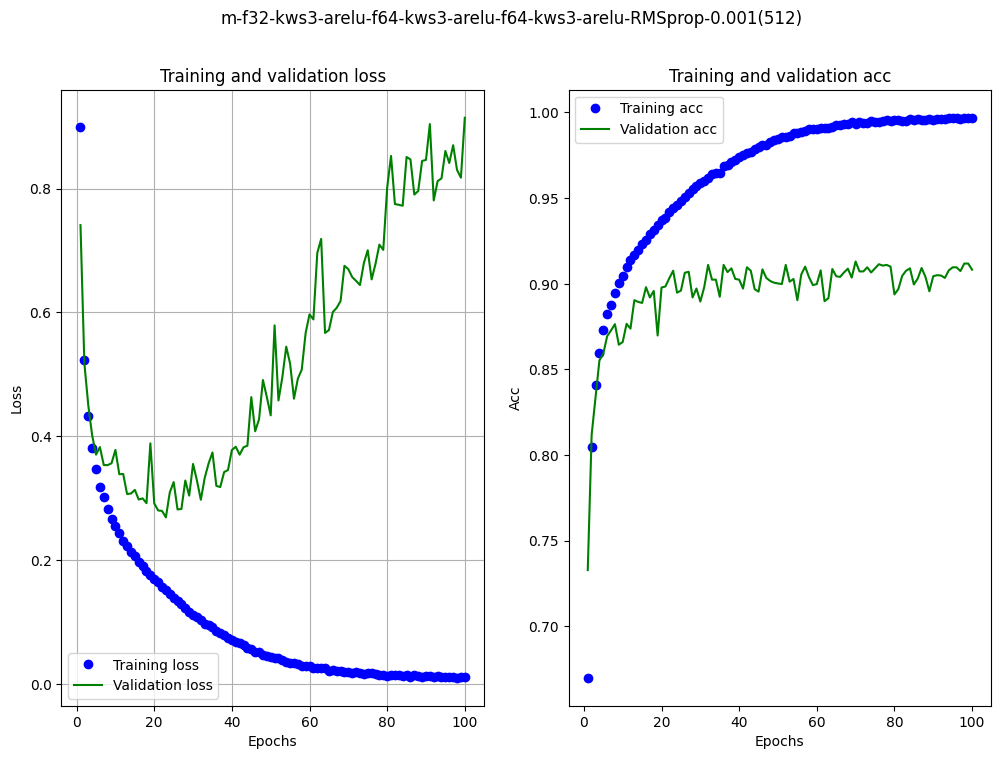

In [145]:
model_0 = retest_NN(
                    filters=[32, 64, 64, 64], 
                    windows=[3, 3, 3],
                    act=['relu' for _ in range(4)],  # mish sigmoid
                    opt=optimizers.legacy.RMSprop,  # Adadelta Adam
                    lr=0.001,
                    bs=512,
                    epochs=100
                    )

За автоматичним встановленням `'accuracy'` обирається `metrics.CategoricalAccuracy()`, значення `accuracy` та `categorical_accuracy` - __ідентичні__.

Для моделі-0 з 23-ї епохи помітний початок `перенавчання`, тренувальні loss: 0.1510 - accuracy: 0.9440, валідаційні - val_loss: 0.2689 - `val_accuracy`: __0.9076__.<br>
8 c тренування на епоху.

In [146]:
model_0.summary()

Model: "m-f32-kws3-arelu-f64-kws3-arelu-f64-kws3-arelu-RMSprop-0.001"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatt

Замінимо `relu` на `sigmoid`:

Epoch 1/100
118/118 [==============================] - 8s 64ms/step - loss: 2.1456 - accuracy: 0.2218 - categorical_accuracy: 0.2218 - val_loss: 1.5915 - val_accuracy: 0.5110 - val_categorical_accuracy: 0.5110
Epoch 2/100
118/118 [==============================] - 7s 62ms/step - loss: 1.1967 - accuracy: 0.6173 - categorical_accuracy: 0.6173 - val_loss: 1.0225 - val_accuracy: 0.6478 - val_categorical_accuracy: 0.6478
Epoch 3/100
118/118 [==============================] - 7s 63ms/step - loss: 0.8881 - accuracy: 0.6905 - categorical_accuracy: 0.6905 - val_loss: 0.8352 - val_accuracy: 0.6934 - val_categorical_accuracy: 0.6934
Epoch 4/100
118/118 [==============================] - 7s 62ms/step - loss: 0.7743 - accuracy: 0.7168 - categorical_accuracy: 0.7168 - val_loss: 0.8137 - val_accuracy: 0.6908 - val_categorical_accuracy: 0.6908
Epoch 5/100
118/118 [==============================] - 7s 63ms/step - loss: 0.7084 - accuracy: 0.7356 - categorical_accuracy: 0.7356 - val_loss: 0.7351 - val_ac

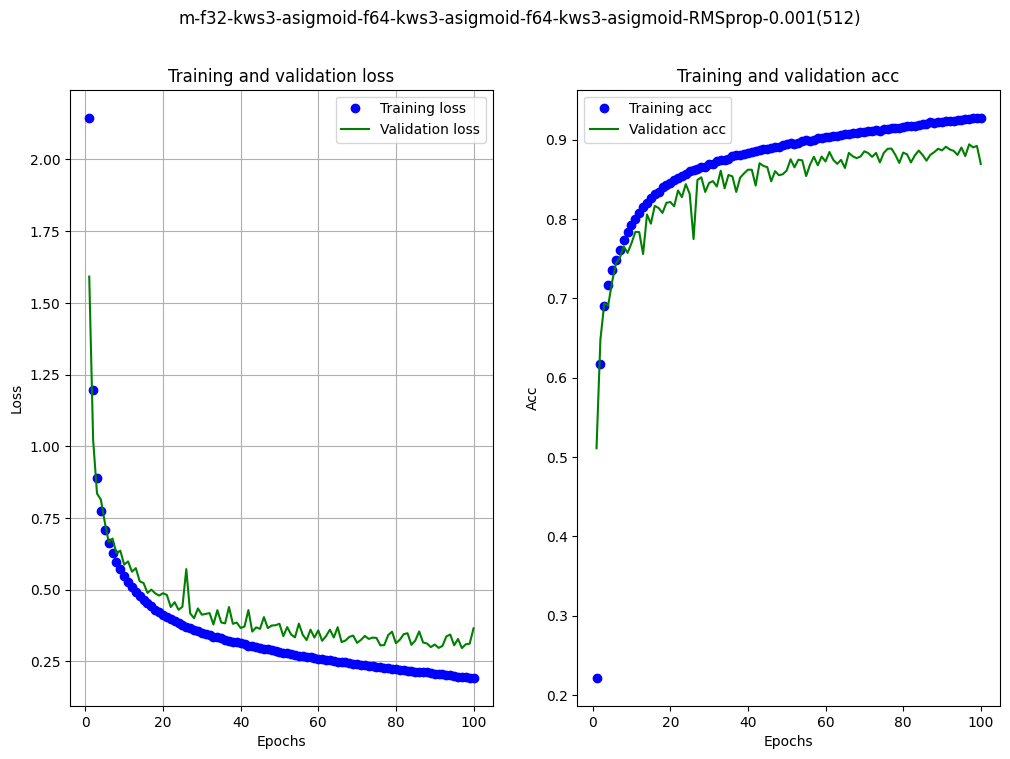

In [147]:
model_1 = retest_NN(
          filters=[32, 64, 64, 64], 
          windows=[3, 3, 3],
          act=['sigmoid' for _ in range(4)],  # mish sigmoid
          opt=optimizers.legacy.RMSprop,  # Adadelta Adam
          lr=0.001,
          bs=512,
          epochs=100
          )

Для моделі-1 за 100 епох найкращим результатом можна вважати 98 епоху: тренувальні - loss: 0.1966 - accuracy: 0.9258, валідаційні - val_loss: 0.2962 - `val_accuracy`: __0.8940__<br>
8.6 c тренування на епоху.

Трішки гірший результат за модель-0, але все одно - кращий за багатошарові мережі з попереднього завдання.

Змінимо опримізатор на відміну від моделі-0:

Epoch 1/100
118/118 [==============================] - 7s 57ms/step - loss: 0.8930 - accuracy: 0.6732 - categorical_accuracy: 0.6732 - val_loss: 0.6121 - val_accuracy: 0.7764 - val_categorical_accuracy: 0.7764
Epoch 2/100
118/118 [==============================] - 7s 55ms/step - loss: 0.5192 - accuracy: 0.8071 - categorical_accuracy: 0.8071 - val_loss: 0.4887 - val_accuracy: 0.8240 - val_categorical_accuracy: 0.8240
Epoch 3/100
118/118 [==============================] - 7s 56ms/step - loss: 0.4466 - accuracy: 0.8366 - categorical_accuracy: 0.8366 - val_loss: 0.4629 - val_accuracy: 0.8300 - val_categorical_accuracy: 0.8300
Epoch 4/100
118/118 [==============================] - 7s 55ms/step - loss: 0.4062 - accuracy: 0.8539 - categorical_accuracy: 0.8539 - val_loss: 0.4068 - val_accuracy: 0.8572 - val_categorical_accuracy: 0.8572
Epoch 5/100
118/118 [==============================] - 7s 56ms/step - loss: 0.3732 - accuracy: 0.8668 - categorical_accuracy: 0.8668 - val_loss: 0.3771 - val_ac

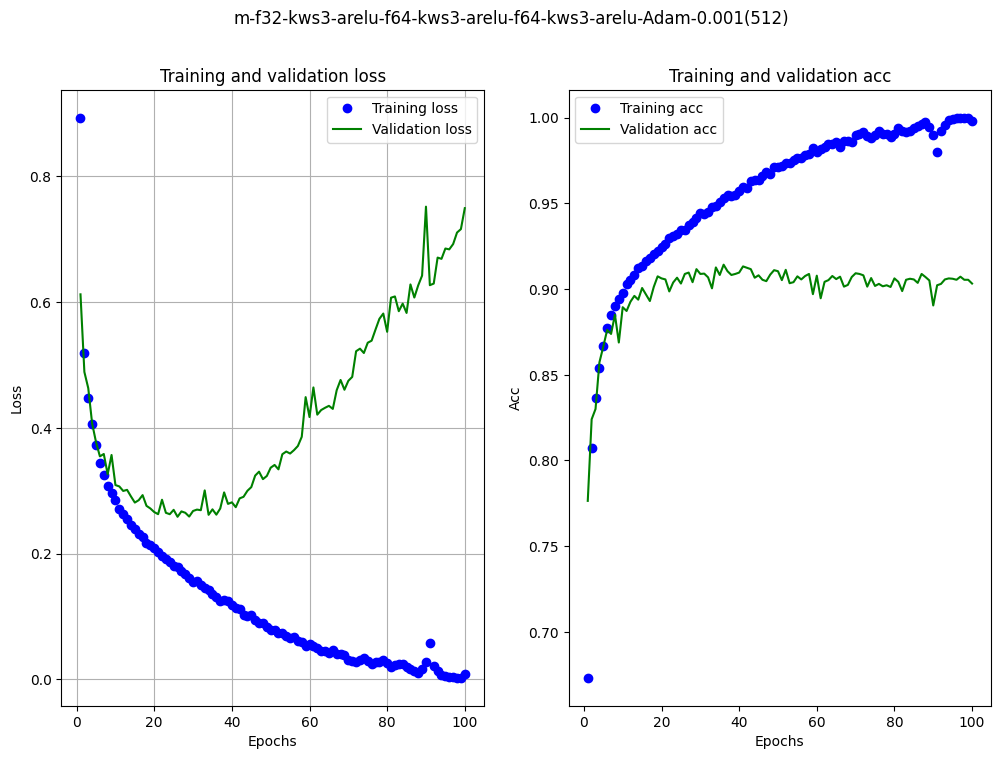

In [148]:
model_2 = retest_NN(
          filters=[32, 64, 64, 64], 
          windows=[3, 3, 3],
          act=['relu' for _ in range(4)],  # mish sigmoid
          opt=optimizers.legacy.Adam,  # Adadelta Adam
          lr=0.001,
          bs=512,
          epochs=100
          )

Після 26ї епохи явний початок перенавчання, оптимальне значення: тренувальної - loss: 0.1783 - accuracy: 0.9342, валідаційної - val_loss: 0.2584 - `val_accuracy`: __0.9088__
<br>
Незначно краще за модель-0. <br>8 c тренування на епоху.

Epoch 1/100
118/118 [==============================] - 7s 57ms/step - loss: 1.1512 - accuracy: 0.6468 - categorical_accuracy: 0.6468 - val_loss: 0.6070 - val_accuracy: 0.7676 - val_categorical_accuracy: 0.7676
Epoch 2/100
118/118 [==============================] - 7s 56ms/step - loss: 0.4481 - accuracy: 0.8320 - categorical_accuracy: 0.8320 - val_loss: 0.4454 - val_accuracy: 0.8338 - val_categorical_accuracy: 0.8338
Epoch 3/100
118/118 [==============================] - 7s 56ms/step - loss: 0.3632 - accuracy: 0.8655 - categorical_accuracy: 0.8655 - val_loss: 0.4822 - val_accuracy: 0.8280 - val_categorical_accuracy: 0.8280
Epoch 4/100
118/118 [==============================] - 7s 56ms/step - loss: 0.3211 - accuracy: 0.8794 - categorical_accuracy: 0.8794 - val_loss: 0.4254 - val_accuracy: 0.8466 - val_categorical_accuracy: 0.8466
Epoch 5/100
118/118 [==============================] - 7s 56ms/step - loss: 0.2950 - accuracy: 0.8875 - categorical_accuracy: 0.8875 - val_loss: 0.4576 - val_ac

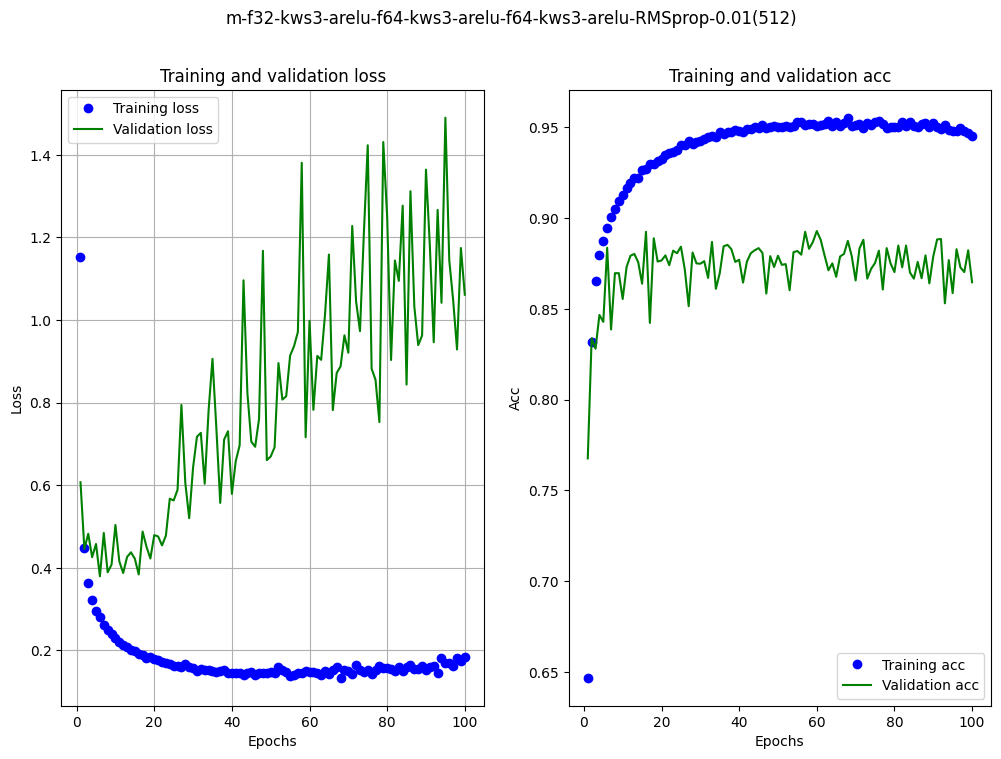

In [149]:
model_3 = retest_NN(
          filters=[32, 64, 64, 64], 
          windows=[3, 3, 3],
          act=['relu' for _ in range(4)],  # mish sigmoid
          opt=optimizers.legacy.RMSprop,  # Adadelta Adam
          lr=0.01,
          bs=512,
          epochs=100
          )

 Збільшуючи рейтинг-швидкості навчання (`lr`) - просто змістили(зменшили) оптимум кількості епох, точність трішки впала, втрати - зросли.

Збільшення розміру батчів майже не вплинуло:

Epoch 1/100
59/59 [==============================] - 7s 109ms/step - loss: 1.0654 - accuracy: 0.6145 - categorical_accuracy: 0.6145 - val_loss: 0.7913 - val_accuracy: 0.7086 - val_categorical_accuracy: 0.7086
Epoch 2/100
59/59 [==============================] - 6s 106ms/step - loss: 0.6486 - accuracy: 0.7542 - categorical_accuracy: 0.7542 - val_loss: 0.6476 - val_accuracy: 0.7576 - val_categorical_accuracy: 0.7576
Epoch 3/100
59/59 [==============================] - 6s 106ms/step - loss: 0.5551 - accuracy: 0.7885 - categorical_accuracy: 0.7885 - val_loss: 0.5306 - val_accuracy: 0.8024 - val_categorical_accuracy: 0.8024
Epoch 4/100
59/59 [==============================] - 6s 106ms/step - loss: 0.4920 - accuracy: 0.8153 - categorical_accuracy: 0.8153 - val_loss: 0.4700 - val_accuracy: 0.8272 - val_categorical_accuracy: 0.8272
Epoch 5/100
59/59 [==============================] - 6s 106ms/step - loss: 0.4416 - accuracy: 0.8375 - categorical_accuracy: 0.8375 - val_loss: 0.4294 - val_accurac

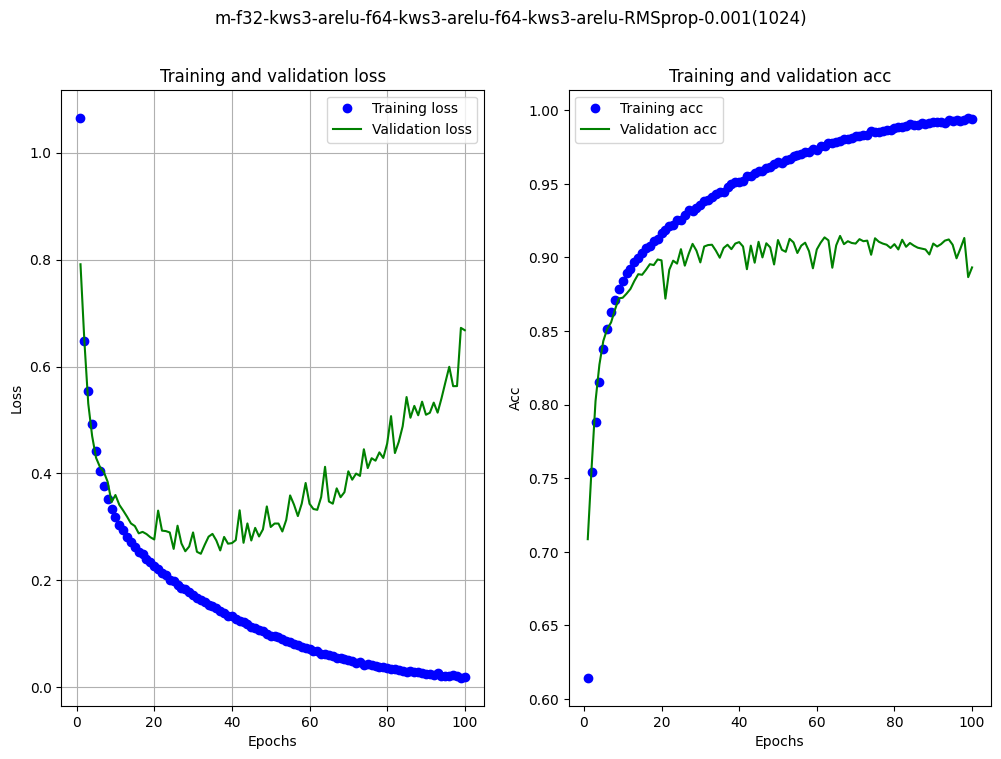

In [150]:
model_4 = retest_NN(
          filters=[32, 64, 64, 64], 
          windows=[3, 3, 3],
          act=['relu' for _ in range(4)],  # mish sigmoid
          opt=optimizers.legacy.RMSprop,  # Adadelta Adam
          lr=0.001,
          bs=1024,
          epochs=100
          )

З 32-ї епохи помітний початок `перенавчання`, тренувальні - loss: 0.1637 - accuracy: 0.9389, валідаційні  - val_loss: 0.2497 - `val_accuracy`: __0.9084__.<br>
6.1 c тренування на епоху. Всюди трішечки краще за модель-0.

За розширення вікна згортки з 3 до 5, враховуючи малий розмір вихідних зображень - зменшуємо кількість шарів.

Epoch 1/100
118/118 [==============================] - 8s 64ms/step - loss: 0.7974 - accuracy: 0.7122 - categorical_accuracy: 0.7122 - val_loss: 0.6084 - val_accuracy: 0.7762 - val_categorical_accuracy: 0.7762
Epoch 2/100
118/118 [==============================] - 7s 63ms/step - loss: 0.4433 - accuracy: 0.8389 - categorical_accuracy: 0.8389 - val_loss: 0.4659 - val_accuracy: 0.8282 - val_categorical_accuracy: 0.8282
Epoch 3/100
118/118 [==============================] - 7s 62ms/step - loss: 0.3633 - accuracy: 0.8682 - categorical_accuracy: 0.8682 - val_loss: 0.4443 - val_accuracy: 0.8410 - val_categorical_accuracy: 0.8410
Epoch 4/100
118/118 [==============================] - 7s 63ms/step - loss: 0.3179 - accuracy: 0.8851 - categorical_accuracy: 0.8851 - val_loss: 0.3548 - val_accuracy: 0.8706 - val_categorical_accuracy: 0.8706
Epoch 5/100
118/118 [==============================] - 7s 63ms/step - loss: 0.2848 - accuracy: 0.8958 - categorical_accuracy: 0.8958 - val_loss: 0.3288 - val_ac

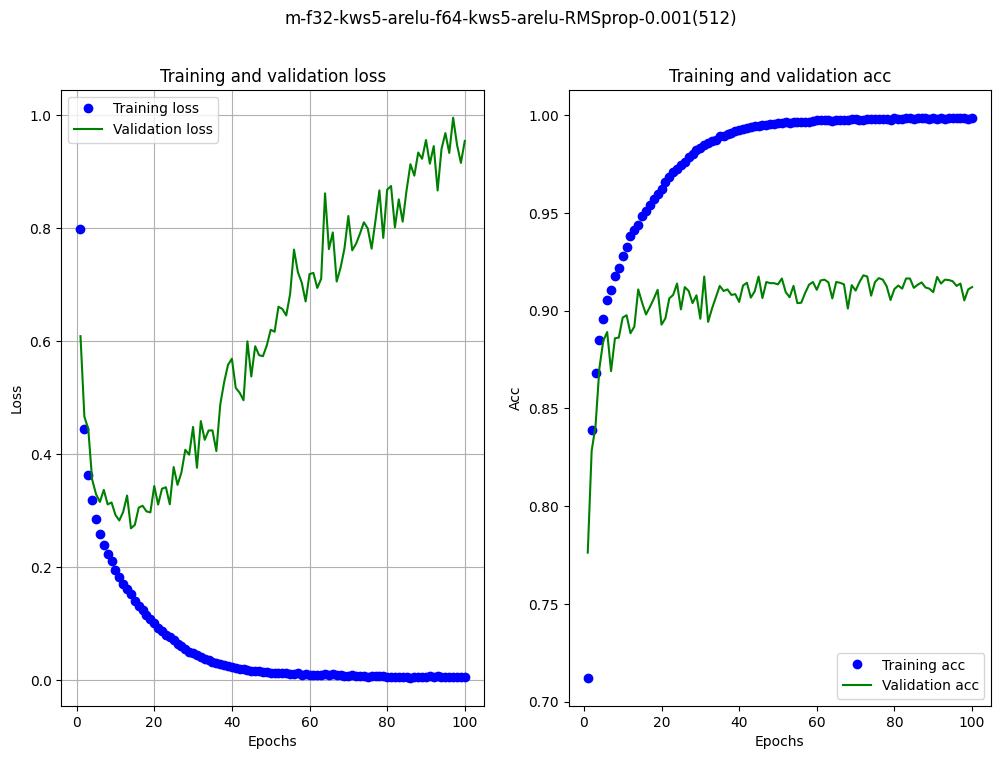

In [155]:
model_5 = retest_NN(
          filters=[32, 64, 64], 
          windows=[5, 5],
          act=['relu' for _ in range(4)],  # mish sigmoid
          opt=optimizers.legacy.RMSprop,  # Adadelta Adam
          lr=0.001,
          bs=512,
          epochs=100
          )

З 17-ї епохи помітний початок `перенавчання`, тренувальні - loss: 0.1516 - accuracy: 0.9438, валідаційні - val_loss: 0.2684 - `val_accuracy`: __0.9108__.<br>
7.6 c тренування на епоху.

Зменшимо кількість фільтрів, на відміну від моделі-0:

Epoch 1/100
118/118 [==============================] - 4s 26ms/step - loss: 1.0799 - accuracy: 0.6083 - categorical_accuracy: 0.6083 - val_loss: 0.8102 - val_accuracy: 0.6694 - val_categorical_accuracy: 0.6694
Epoch 2/100
118/118 [==============================] - 3s 25ms/step - loss: 0.6361 - accuracy: 0.7600 - categorical_accuracy: 0.7600 - val_loss: 0.6207 - val_accuracy: 0.7744 - val_categorical_accuracy: 0.7744
Epoch 3/100
118/118 [==============================] - 3s 24ms/step - loss: 0.5301 - accuracy: 0.8019 - categorical_accuracy: 0.8019 - val_loss: 0.5711 - val_accuracy: 0.7738 - val_categorical_accuracy: 0.7738
Epoch 4/100
118/118 [==============================] - 3s 23ms/step - loss: 0.4703 - accuracy: 0.8275 - categorical_accuracy: 0.8275 - val_loss: 0.4642 - val_accuracy: 0.8316 - val_categorical_accuracy: 0.8316
Epoch 5/100
118/118 [==============================] - 3s 23ms/step - loss: 0.4290 - accuracy: 0.8436 - categorical_accuracy: 0.8436 - val_loss: 0.5000 - val_ac

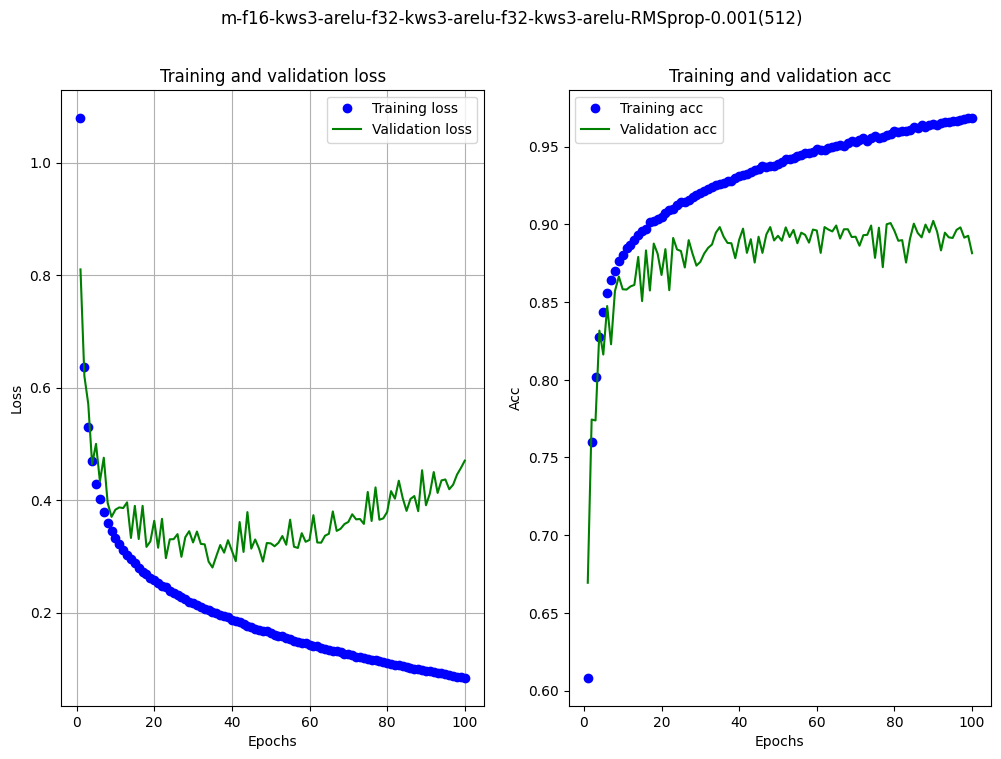

In [152]:
model_6 = retest_NN(
          filters=[16, 32, 32, 32], 
          windows=[3, 3, 3],
          act=['relu' for _ in range(4)],  # mish sigmoid
          opt=optimizers.legacy.RMSprop,  # Adadelta Adam
          lr=0.001,
          bs=512,
          epochs=100
          )

З 35-ї епохи помітний початок `перенавчання`, тренувальні - loss: 0.2015 - accuracy: 0.9257, валідаційні - val_loss: 0.2802 - `val_accuracy`: __0.8982 __.<br>
3.25 c тренування на епоху.

За розширення вікна згортки з 3 до 9, враховуючи малий розмір вихідних зображень - довелося зменшити кількість груп шарів до 1.

Epoch 1/100
118/118 [==============================] - 4s 29ms/step - loss: 0.6733 - accuracy: 0.7623 - categorical_accuracy: 0.7623 - val_loss: 0.5194 - val_accuracy: 0.8078 - val_categorical_accuracy: 0.8078
Epoch 2/100
118/118 [==============================] - 3s 28ms/step - loss: 0.4100 - accuracy: 0.8540 - categorical_accuracy: 0.8540 - val_loss: 0.5006 - val_accuracy: 0.8270 - val_categorical_accuracy: 0.8270
Epoch 3/100
118/118 [==============================] - 3s 29ms/step - loss: 0.3451 - accuracy: 0.8746 - categorical_accuracy: 0.8746 - val_loss: 0.3737 - val_accuracy: 0.8650 - val_categorical_accuracy: 0.8650
Epoch 4/100
118/118 [==============================] - 3s 28ms/step - loss: 0.3107 - accuracy: 0.8861 - categorical_accuracy: 0.8861 - val_loss: 0.4326 - val_accuracy: 0.8436 - val_categorical_accuracy: 0.8436
Epoch 5/100
118/118 [==============================] - 3s 28ms/step - loss: 0.2833 - accuracy: 0.8964 - categorical_accuracy: 0.8964 - val_loss: 0.3877 - val_ac

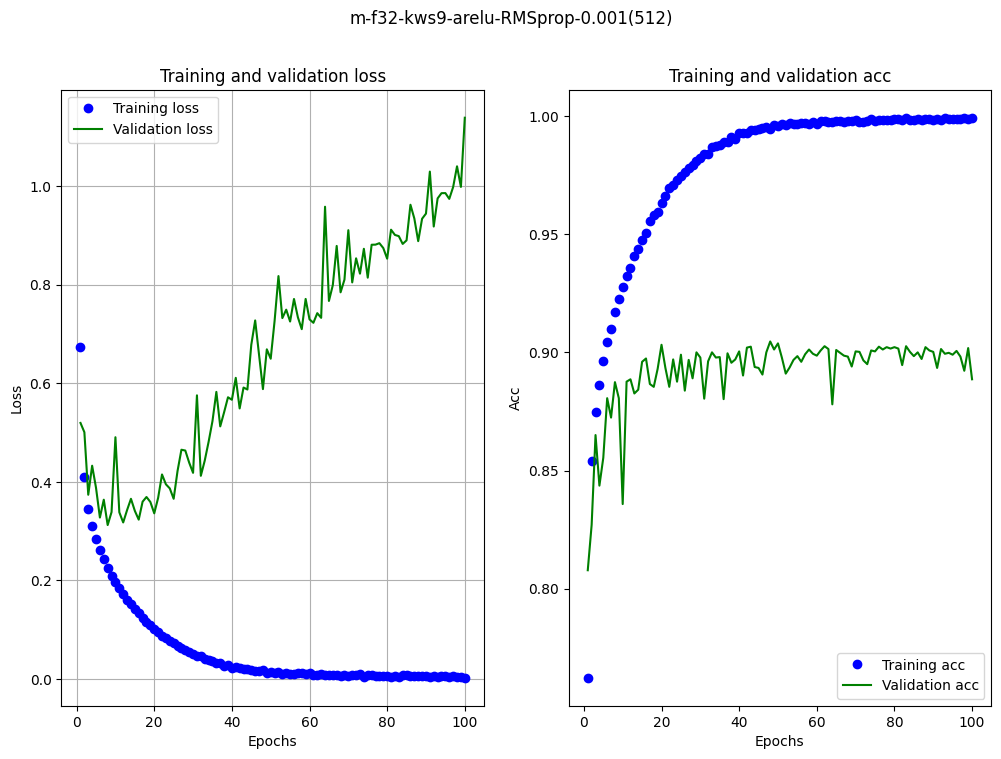

In [154]:
model_7 = retest_NN(
          filters=[32, 64], 
          windows=[9 ],
          act=['relu' for _ in range(4)],  # mish sigmoid
          opt=optimizers.legacy.RMSprop,  # Adadelta Adam
          lr=0.001,
          bs=512,
          epochs=100
          )

Десь з 12-ї епохи помітний початок `перенавчання`, тренувальні - loss: 0.1729 - accuracy: 0.9358, валідаційної - val_loss: 0.3175 - val_accuracy: __0.8886__.<br>
3.3 c тренування на епоху.

Збільшимо кількість фільтрів на шарах:

Epoch 1/100
118/118 [==============================] - 21s 171ms/step - loss: 0.8499 - accuracy: 0.6958 - categorical_accuracy: 0.6958 - val_loss: 0.6263 - val_accuracy: 0.7614 - val_categorical_accuracy: 0.7614
Epoch 2/100
118/118 [==============================] - 20s 170ms/step - loss: 0.4655 - accuracy: 0.8261 - categorical_accuracy: 0.8261 - val_loss: 0.5393 - val_accuracy: 0.8122 - val_categorical_accuracy: 0.8122
Epoch 3/100
118/118 [==============================] - 20s 169ms/step - loss: 0.3699 - accuracy: 0.8642 - categorical_accuracy: 0.8642 - val_loss: 0.4410 - val_accuracy: 0.8300 - val_categorical_accuracy: 0.8300
Epoch 4/100
118/118 [==============================] - 20s 168ms/step - loss: 0.3177 - accuracy: 0.8835 - categorical_accuracy: 0.8835 - val_loss: 0.4757 - val_accuracy: 0.8154 - val_categorical_accuracy: 0.8154
Epoch 5/100
118/118 [==============================] - 20s 169ms/step - loss: 0.2849 - accuracy: 0.8952 - categorical_accuracy: 0.8952 - val_loss: 0.388

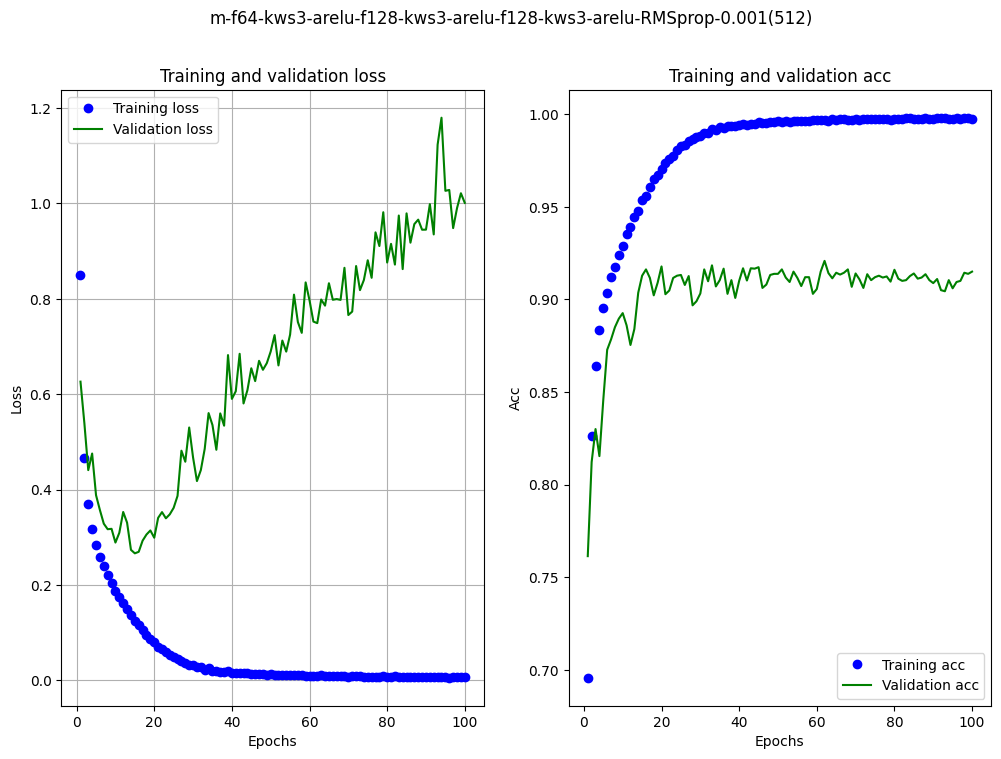

In [158]:
model_8 = retest_NN(
          filters=[64, 128, 128, 128], 
          windows=[3, 3, 3],
          act=['relu' for _ in range(4)],  # mish sigmoid
          opt=optimizers.legacy.RMSprop,  # Adadelta Adam
          lr=0.001,
          bs=512,
          epochs=100
          )

Десь з 15-ї епохи помітний початок `перенавчання`, тренувальні - loss: 0.1246 - accuracy: 0.9535, валідаційні - val_loss: 0.2665 - `val_accuracy`: __0.9128__.<br>
20.17 c тренування на епоху.

##### __Сonclusions 0__

Аналізуючи вищенаведені варіанти:

- збільшення кількості фільтрів на шарах сприяє швидшому перенавчаню, та ледь-помітному покращенню валідаційної точності, але час тренування значно триваліший.
- за розширення вікна згортки з 3 до 9, і зменшення кількість груп шарів до 1 - пришвидшує тренування, прискорює перенавання і погіршує валідаційну точність.
- зменшення кількості фільтрів - сприяє уповільненню перенавчання, прискоренню тренування і незначному зниженні валідаційної точності.
- за розширення вікна згортки з 3 до 5, і зменшенні кількість груп шарів - трішки прискорює перенавання і покращує валідаційну точність.
- збільшення розміру батчів майже не вплинуло - уповільнює перенавчання і трішки прискорює тренування, з незначним покращенням валідаційної точності.
- збільшуючи рейтинг-швидкості навчання (`lr`) - трішки уповільнює перенавчання, і трішки погіршує валідаційну точність, втрати - зросли.
- зміна опримізатора на Adam - трішки уповільнило перенавчання, незначно підвищило валідаційну точніть, але і втрати на валідаційній вибірці.
- заміна `relu` на `sigmoid` -трішки погіршила валідаційну точність, і значно уповільнило перенавчання (98 епоха, якщо не пізніше), схоже на недонавчання.
<br><br>
Тому, спробуємо:

Epoch 1/200
59/59 [==============================] - 24s 407ms/step - loss: 0.9327 - accuracy: 0.6646 - categorical_accuracy: 0.6646 - val_loss: 0.5963 - val_accuracy: 0.7712 - val_categorical_accuracy: 0.7712
Epoch 2/200
59/59 [==============================] - 24s 401ms/step - loss: 0.5458 - accuracy: 0.7968 - categorical_accuracy: 0.7968 - val_loss: 0.4673 - val_accuracy: 0.8300 - val_categorical_accuracy: 0.8300
Epoch 3/200
59/59 [==============================] - 24s 398ms/step - loss: 0.4490 - accuracy: 0.8366 - categorical_accuracy: 0.8366 - val_loss: 0.4424 - val_accuracy: 0.8378 - val_categorical_accuracy: 0.8378
Epoch 4/200
59/59 [==============================] - 24s 401ms/step - loss: 0.3906 - accuracy: 0.8588 - categorical_accuracy: 0.8588 - val_loss: 0.3964 - val_accuracy: 0.8594 - val_categorical_accuracy: 0.8594
Epoch 5/200
59/59 [==============================] - 24s 401ms/step - loss: 0.3535 - accuracy: 0.8722 - categorical_accuracy: 0.8722 - val_loss: 0.3751 - val_ac

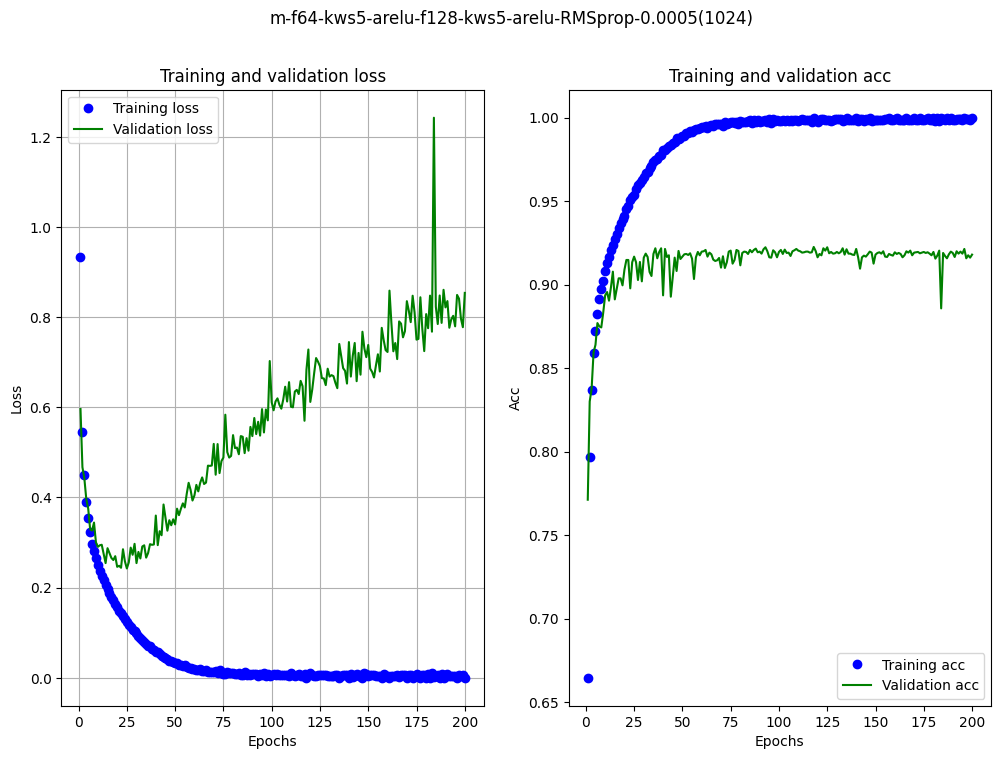

In [160]:
model_8 = retest_NN(
          filters=[64, 128, 128], 
          windows=[5, 5],
          act=['relu' for _ in range(3)],
          opt=optimizers.legacy.RMSprop,
          lr=0.0005,
          bs=1024,
          epochs=200
          )

З 25-ї епохи помітний початок `перенавчання`, тренувальні - loss: 0.1248 - accuracy: 0.9540, валідаційні - val_loss: 0.2425 - `val_accuracy`: __0.9168 __.<br>
24 c тренування на епоху.

Epoch 1/70
59/59 [==============================] - 24s 406ms/step - loss: 0.9285 - accuracy: 0.6690 - categorical_accuracy: 0.6690 - val_loss: 0.7663 - val_accuracy: 0.7126 - val_categorical_accuracy: 0.7126
Epoch 2/70
59/59 [==============================] - 25s 416ms/step - loss: 0.5016 - accuracy: 0.8167 - categorical_accuracy: 0.8167 - val_loss: 0.4873 - val_accuracy: 0.8182 - val_categorical_accuracy: 0.8182
Epoch 3/70
59/59 [==============================] - 24s 403ms/step - loss: 0.3912 - accuracy: 0.8590 - categorical_accuracy: 0.8590 - val_loss: 0.3764 - val_accuracy: 0.8558 - val_categorical_accuracy: 0.8558
Epoch 4/70
59/59 [==============================] - 24s 400ms/step - loss: 0.3363 - accuracy: 0.8779 - categorical_accuracy: 0.8779 - val_loss: 0.3773 - val_accuracy: 0.8556 - val_categorical_accuracy: 0.8556
Epoch 5/70
59/59 [==============================] - 24s 402ms/step - loss: 0.2997 - accuracy: 0.8901 - categorical_accuracy: 0.8901 - val_loss: 0.3122 - val_accurac

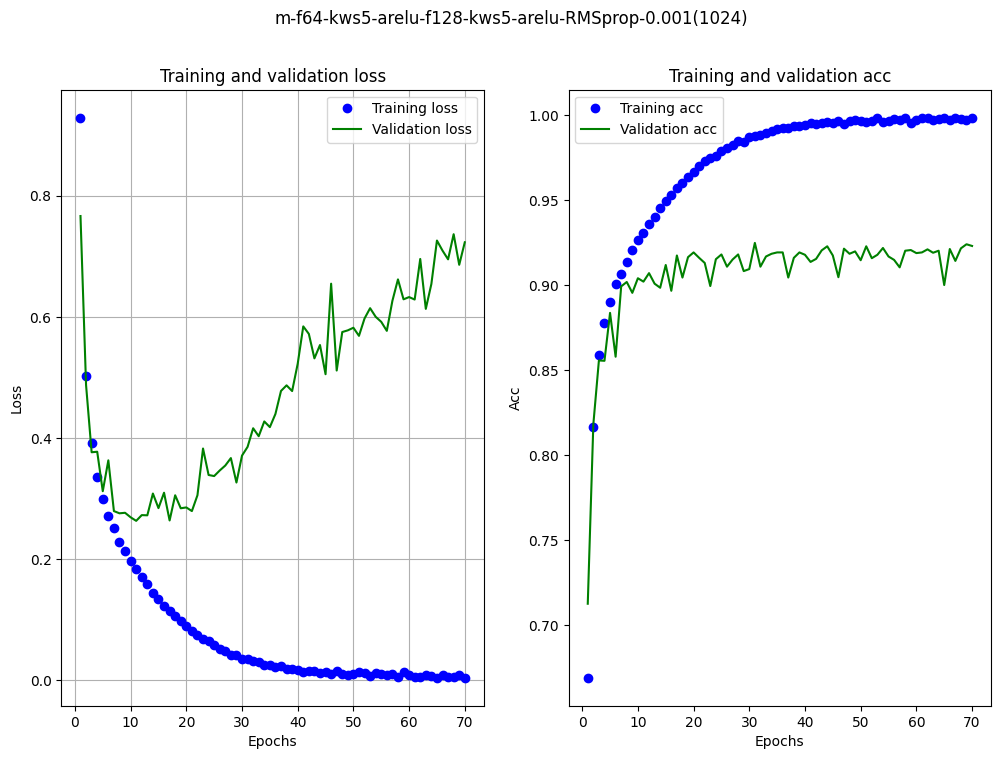

In [163]:
model_9 = retest_NN(
          filters=[64, 128, 128], 
          windows=[5, 5],
          act=['relu' for _ in range(3)],
          opt=optimizers.legacy.RMSprop,
          lr=0.001,
          bs=1024,
          epochs=70
          )

З 17-ї епохи помітний початок `перенавчання`, тренувальні - loss: 0.1137 - accuracy: 0.9573, валідаційні - val_loss: 0.2639 - `val_accuracy`: __0.9176__.<br>
24.4 c тренування на епоху.


In [165]:
test_loss, test_acc, test_acc_category = model_9.evaluate(images_test, labels_test)
print(test_acc)

  1/157 [..............................] - ETA: 3s - loss: 0.7973 - accuracy: 0.9375 - categorical_accuracy: 0.9375

157/157 [==============================] - 1s 7ms/step - loss: 0.7533 - accuracy: 0.9182 - categorical_accuracy: 0.9182
0.9182000160217285


більше 95% на тренувальних, та більше 91% на валідаційних та тестових даних.

##### __Сonclusions 1__

Загалом для даного датасету (зображення 28*28) великої кількості шарів(згорток) не потрібно, бо неможливо виділити(знайти бо й розмістити) біль конкретні ознаки на малому розміру початкових зображень. Так само через це просто не можна застосовувати відносно великі матриці згорток. Згорткова нейромережа дуже підходяща для завдань розпізнавання образів, і має загалом кращі результати точності ніж звичайна багатошарова повнозв'язна мережа (в порівнянні з результатами попереднього завдання 0.8995 проти 0.9182). Налаштування (гіперпараметри) так само можуть сильно впливати на результати як і в інших моделях мереж, властиві як перенавчання так і недонавчання. Тому - як завжди: треба підбирати гіперпараметри ждя кожного конкретного випадку (датасету).

# __Part 2__

`VGG16` в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти `максимально можливої точності класифікації` за рахунок `маніпуляції параметрами` мережі. Під час навчання використовуйте `прийоми донавчання` та `виділення ознак`.

##### __Dataset__

##### __Model__

##### __Training__

##### __Error Analysis__

##### __Сonclusions 2__